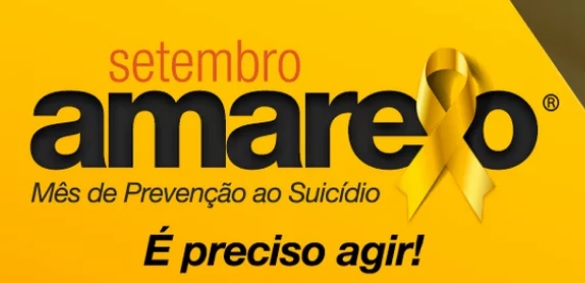

In [1]:
from IPython.display import Image
Image("SA.jpg")

* Desde 2014, a Associação Brasileira de Psiquiatria – ABP, em parceria com o Conselho Federal de Medicina – CFM, organiza nacionalmente o Setembro Amarelo®. O dia 10 de Setembro é, oficialmente, o Dia Mundial de Prevenção ao Suicídio, mas a campanha acontece durante todo o ano.


* São registrados cerca de 12 mil suicídios todos os anos no Brasil e mais de 01 milhão no mundo. Trata-se de uma triste realidade, que registra cada vez mais casos, principalmente entre os jovens. Cerca de 96,8% dos casos de suicídio estavam relacionados a transtornos mentais. Em primeiro lugar está a depressão, seguida do transtorno bipolar e abuso de substâncias.


* Com o objetivo de prevenir e reduzir estes números a campanha Setembro Amarelo® cresceu e conquistou o Brasil inteiro. Para isso, o apoio das nossas federadas, núcleos, associados e de toda a sociedade é fundamental.

In [2]:
#Importando as bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

%matplotlib inline

## Abrindo o dataset

In [3]:
#Importando o dataset
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv')

## Análise Exploratória

In [4]:
print(df.shape)
df.head()

(27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#### Dicionário de Variáveis

* country: país onde os dados foram registrados
* year: ano em que os dados foram registrados
* sex: sexo considerado no registro
* age: faixa etária considerada
* suicides_no: número de suicídios
* population: população para o grupo
* suicides/100k pop: número de suicídios por 100 mil habitantes
* country_year: identificador contendo country + year
* HDI for year: Índice de Desenvolvimento Humano (IDH) para o ano
* gdp_for_year: Produto Interno Bruto (PIB) para o ano
* gdp_per_capita: Produto Interno Bruto (PIB) per capita

In [5]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Taxa de suicídios no Brasil

In [6]:
#Dados relacionados ao Brasil
df_brasil = df[df['country'] == "Brazil"]
print(df_brasil.shape)
df_brasil.head()

(372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [7]:
#Valores nulos para o dataframe sobre o Brasil
df_brasil.isnull().sum()

country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

* Na coluna HDI for year, que seria o Índice de Desenvolvimento Humano (IDH) por ano, há muitos valores ausentes nas células, o que pode dar uma interpretação incorreta dos dados.

#### Descrição dos dados

In [8]:
df_brasil.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,372.000000,372.000000,3.720000e+02,372.000000,120.000000,372.000000
mean,2000.000000,609.174731,1.305401e+07,5.846022,0.694900,6091.483871
std,8.956318,652.567097,6.655806e+06,5.623846,0.061539,3711.626223
min,1985.000000,25.000000,6.556210e+05,0.150000,0.576000,1898.000000
25%,1992.000000,99.500000,8.193910e+06,2.152500,0.648000,3310.000000
50%,2000.000000,348.000000,1.478517e+07,2.800000,0.719500,4490.000000
75%,2008.000000,939.000000,1.749273e+07,9.855000,0.746000,9283.000000
max,2015.000000,3238.000000,2.846186e+07,23.920000,0.755000,14245.000000


#### Correlação entre os dados

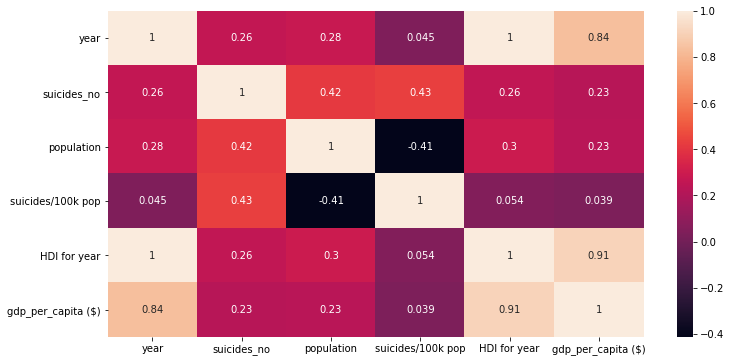

In [9]:
# Gráfico de correlação
plt.figure(figsize=(12,6))
df_brasil_corr = df_brasil.corr()
sns.heatmap(df_brasil_corr, annot = True)
print()

* A matriz de correlação mostra que o aumento no PIB per capita, ou gdp_per_capita, não diminuiu o número de suicídios por 100 mil habitantes, ou suicides/100 kpop. Na realidade, o número de suicídios por 100 mil habitantes se manteve estável, o que contraria o senso comum de que quanto mais pobre (ou mais) rica é a pessoa, maior (ou menor) a tendência de cometer suicídio.

#### Comparação média mundial pela média do Brasil a cada 100 mil habitantes

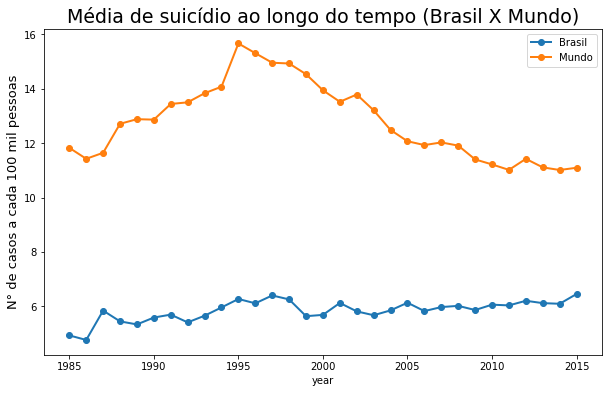

In [10]:
anos = df_brasil.year
media_brasil = df_brasil.groupby('year')['suicides/100k pop'].mean()
media_mundo = df.groupby('year')['suicides/100k pop'].mean()

media_mundo.drop(2016, inplace=True)

plt.figure(figsize=(10, 6))
media_brasil.plot(marker='o', linewidth=2, label = 'Brasil')
media_mundo.plot(marker='o', linewidth=2, label = 'Mundo')
plt.title('Média de suicídio ao longo do tempo (Brasil X Mundo)', fontsize=19)
plt.ylabel('N° de casos a cada 100 mil pessoas',fontsize=13)
plt.legend()
print()

* A média de suicídios para cada 100 mil habitantes no mundo vem caindo aos poucos, enquanto no Brasil, a média sobe a cada ano
* Foi descartado o ano de 2016, porque os dados de 2016 não aparecem para o Brasil

#### Comparação Américas a cada 100 mil habitantes em 2015

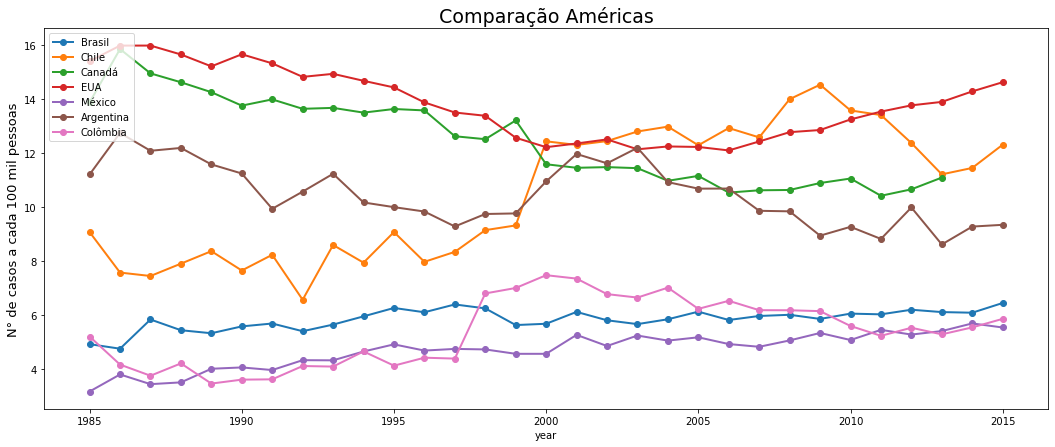

In [11]:
anos = df.year
df_canada = df[df['country'] == "Canada"]
df_chile = df[df['country'] == "Chile"]
df_US = df[df['country'] == "United States"]
df_mexico = df[df['country'] == "Mexico"]
df_argentina = df[df['country'] == "Argentina"]
df_colombia = df[df['country'] == "Colombia"]

media_brasil = df_brasil.groupby('year')['suicides/100k pop'].mean()
media_chile = df_chile.groupby('year')['suicides/100k pop'].mean()
media_canada = df_canada.groupby('year')['suicides/100k pop'].mean()
media_US = df_US.groupby('year')['suicides/100k pop'].mean()
media_mexico = df_mexico.groupby('year')['suicides/100k pop'].mean()
media_argentina = df_argentina.groupby('year')['suicides/100k pop'].mean()
media_colombia = df_colombia.groupby('year')['suicides/100k pop'].mean()


plt.figure(figsize=(18, 7))

media_brasil.plot(marker='o', linewidth=2, label = 'Brasil')
media_chile.plot(marker='o', linewidth=2, label = 'Chile')
media_canada.plot(marker='o', linewidth=2, label = 'Canadá')
media_US.plot(marker='o', linewidth=2, label = 'EUA')
media_mexico.plot(marker='o', linewidth=2, label = 'México')
media_argentina.plot(marker='o', linewidth=2, label = 'Argentina')
media_colombia.plot(marker='o', linewidth=2, label = 'Colômbia')

plt.title('Comparação Américas', fontsize=19)
plt.ylabel('N° de casos a cada 100 mil pessoas',fontsize=13)
plt.legend(loc = 2)
print()

* Entre os países mais populosos das Américas, o Brasil aparecia em 5º lugar, atrás dos EUA, Chile, Canadá e Argentina. A média do Brasil superou as médias da Colômbia e do México.

#### Suicídios no Brasil por 100 mil habitantes por ano

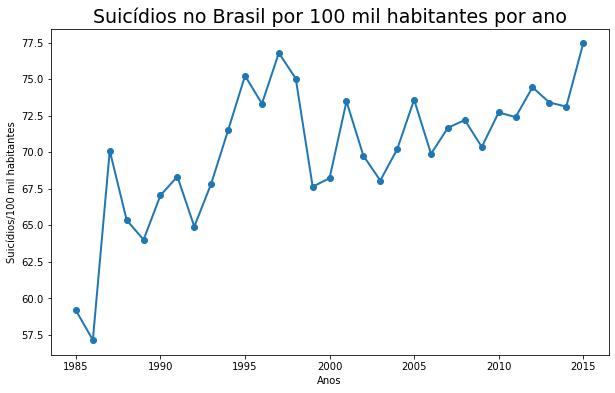

In [12]:
suic_100k = df_brasil.groupby('year')['suicides/100k pop'].sum()
suic_100k.plot(marker='o', linewidth=2, figsize=(10,6))
plt.title('Suicídios no Brasil por 100 mil habitantes por ano', fontsize=19)
plt.ylabel('Suicídios/100 mil habitantes')
plt.xlabel('Anos')
print()

#### Suicídios por ano no Brasil

year
1985    4228
1986    4271
1987    4672
1988    4466
1989    4463
Name: suicides_no, dtype: int64


Total de suicidios no Brasil de 1985-2016: 226613



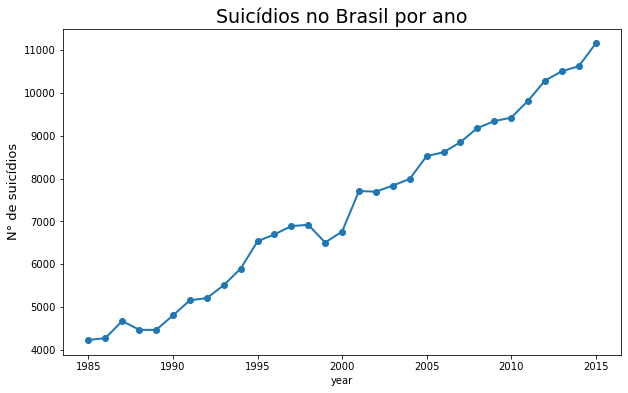

In [13]:
#Suicídio por ano no Brasil registrados
total = df_brasil.groupby('year')['suicides_no'].sum() #Faz o levantamento do nº de suicídios por ano no Brasil
print(total.head())
print('\n')
print('Total de suicidios no Brasil de 1985-2016: {}'.format(df_brasil.suicides_no.sum())) #Soma a quantidade total de suicidios

#Gráfico mostrando a evolução por ano
total.plot(marker='o', linewidth=2, figsize=(10,6)) #Passando os parâmetros para plotar o gráfico
plt.title('Suicídios no Brasil por ano', fontsize=19)
plt.ylabel('N° de suicídios',fontsize=13)
print()

* Fazendo uma análise do número de suicídios no Brasil em si, é possível ver que os casos dispararam de 1985 até 2015, passando de pouco mais de 4000 para mais de 11000 de suicídios por ano. A exceção foi entre 1998 e 1999, onde houve uma pequena queda, de 6922 para 6507.

#### Média de suicídios no Brasil 1985 - 2015

In [14]:
#Média de suicídios no Brasil
df_brasil.suicides_no.mean()

609.1747311827957

Entre 1985 e 1989: 4420.00
Entre 1990 e 1994: 5314.00
Entre 1995 e 1999: 6710.80
Entre 2000 e 2004: 7600.80
Entre 2005 e 2009: 8906.40
Entre 2010 e 2015: 10308.83


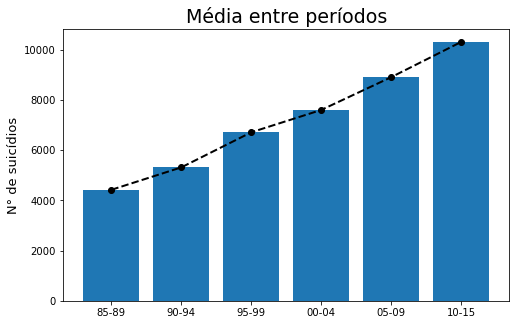

In [15]:
#Média entre períodos
a1 = df_brasil[df_brasil['year']<=1989].suicides_no.sum()/5 #Entre 1985 e 1989
a2 = (total[1990] + total[1991] + total[1992] + total[1993] + total[1994])/5 #Entre 1990 e 1994
a3 = (total[1995] + total[1996] + total[1997] + total[1998] + total[1999])/5 #Entre 1995 e 1999
a4 = (total[2000] + total[2001] + total[2002] + total[2003] + total[2004])/5 #Entre 2000 e 2004
a5 = (total[2005] + total[2006] + total[2007] + total[2008] + total[2009])/5 #Entre 2004 e 2009
a6 = df_brasil[df_brasil['year']>=2010].suicides_no.sum()/6 #Entre 2010 e 2015

print('Entre 1985 e 1989: {:.2f}'.format(a1))
print('Entre 1990 e 1994: {:.2f}'.format(a2))
print('Entre 1995 e 1999: {:.2f}'.format(a3))
print('Entre 2000 e 2004: {:.2f}'.format(a4))
print('Entre 2005 e 2009: {:.2f}'.format(a5))
print('Entre 2010 e 2015: {:.2f}'.format(a6))

ano = ['85-89', '90-94', '95-99', '00-04', '05-09', '10-15']
medias = [a1,a2,a3,a4,a5,a6]
z = [i * 1 for i in medias]

plt.figure(figsize=(8,5))
plt.title('Média entre períodos')
plt.bar(ano, medias,align='center')
plt.plot(ano, z, color= 'black', marker='o', linestyle='--', linewidth=2)
plt.title('Média entre períodos', fontsize=19)
plt.ylabel('N° de suicídios',fontsize=13)
plt.show()

* A média de suicídios entre períodos no Brasil subiu de 1985 até 2015. Em nenhum período houve algum decréscimo nos índices.

#### Suicídios por geração

* G.I. Generation: Geração formada pelos indivíduos que cresceram durante a Grande Depressão (1929–39) nos Estados Unidos e depois participaram dos combates da Segunda Guerra Mundial (1939–45, com participação dos EUA entre 1941 e 1945)

* Silent: População nascida entre 1925 e 1942, nomeadamente durante a Grande Depressão e Segunda Guerra Mundial.

* Boomers: Baby boomers dá nome à geração de pessoas nascidas entre os anos de 1946 e 1964.

* Generation X: Pessoas nascidas a partir dos anos 1960 até o final dos anos 1970.

* Millenials: Nascidos após o início da década de 1980 até, aproximadamente, o final do século. Alguns autores consideram até 2005.

* Generation Z: Nascidos entre a segunda metade dos anos 1990 até o início do ano 2010.

In [16]:
df_brasil['generation'].value_counts()

Generation X       88
Silent             82
Millenials         72
Boomers            68
G.I. Generation    44
Generation Z       18
Name: generation, dtype: int64

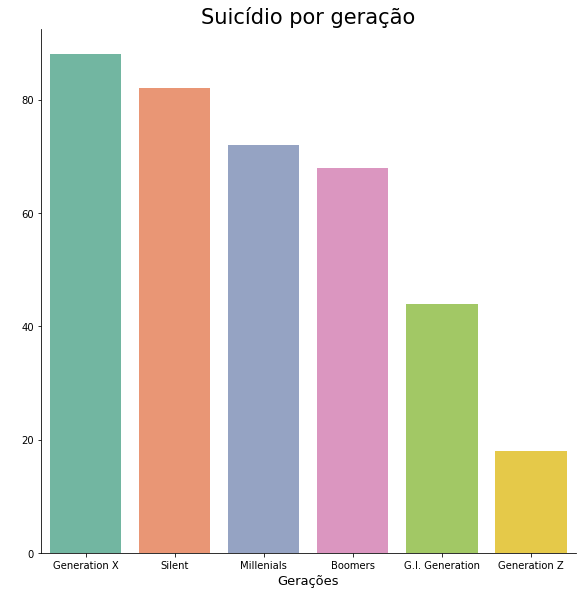

In [17]:
warnings.filterwarnings('ignore') #Ignorando avisos

index = df_brasil['generation'].value_counts().index #Ordenar as colunas do maior para o menor
sns.catplot(x='generation', kind="count",palette="Set2", size = 8,order = index, data=df_brasil)
plt.xlabel('Gerações', fontsize=13)
plt.ylabel(' ')
plt.title('Suicídio por geração',fontsize=21);
print('')

* A Geração X, pessoas nascidas entre os anos 60 e 70 cometeram mais suicídios, enquanto as pessoas da Geração Z, que nasceram entre 1990 e 2010, cometeram menos suicídios

#### Faixa etária com maior índice de suícidio

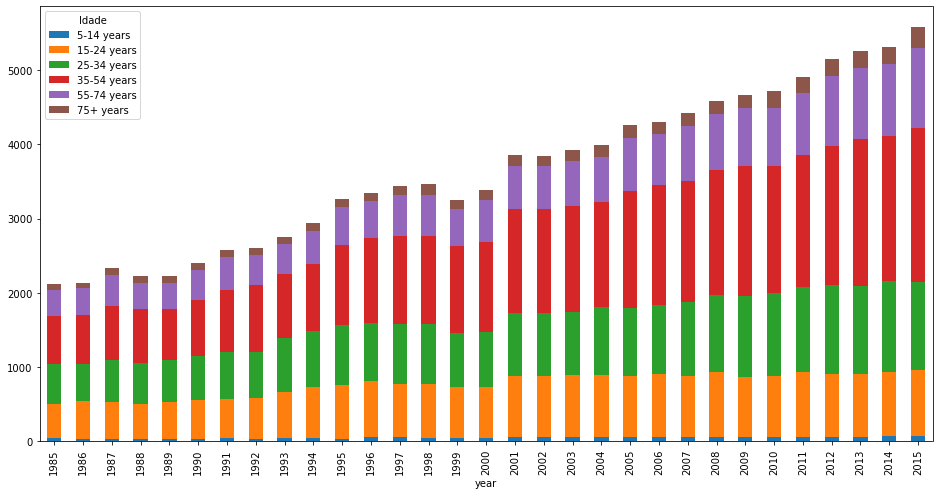

In [18]:
# Criar uma tabela dinâmica
table = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])

# Reordenar as tableas para deixar em ordem crescente
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

In [19]:
# Porcentagem
(table.sum()/table.sum().sum())*100

age
5-14 years      1.336640
15-24 years    19.679807
25-34 years    23.182253
35-54 years    35.240697
55-74 years    16.572747
75+ years       3.987856
dtype: float64

* As pessoas entre 35-54 anos são as que mais cometeram suicídio ao longo de 30 anos, com 35,2%. Em seguida, as que estão entre 25 a 34 anos com 23,2% e jovens entre 15 e 24 anos com 19,7%.

#### Gênero

In [20]:
h_m = df_brasil.groupby('sex').suicides_no.sum()
h_m

sex
female     49015
male      177598
Name: suicides_no, dtype: int64

In [21]:
total_hm = df_brasil.groupby('sex').suicides_no.sum().sum()
total_hm

226613

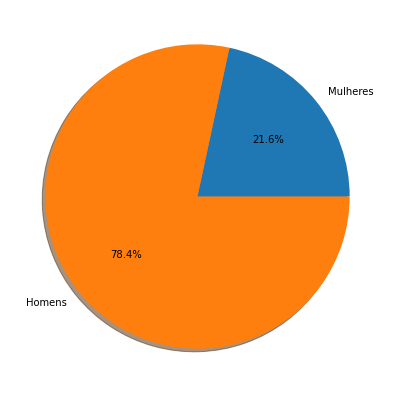

In [22]:
porcentagem = h_m/total_hm
# plotar o gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(porcentagem, labels=['Mulheres', 'Homens'], autopct='%1.1f%%', shadow=True);

* No Brasil, entre 1985 e 2015, os homens majoritariamente aparecem como os que mais cometeram suicídio, com quase 80% dos casos. Olhando os total de número de suicídios entre homens e mulheres, é possível afirmar que dos anos 1985 e 2015, os homens cometeram 3,62 vezes mais suicídios do que as mulheres

In [23]:
gen_suic = pd.pivot_table(df_brasil, values ='suicides_no',index=['sex'],columns=['year']).T
gen_suic.head()

sex,female,male
year,,
1985,177.666667,527.000000
1986,192.333333,519.500000
1987,193.833333,584.833333
1988,189.833333,554.500000
1989,178.500000,565.333333


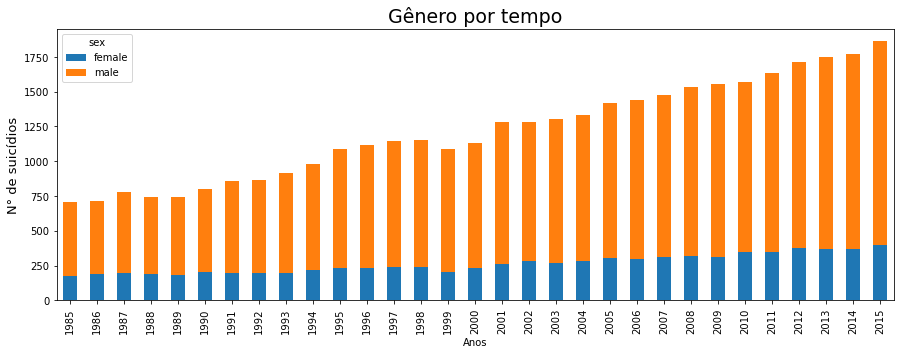

In [24]:
gen_suic.plot.bar(stacked=True, figsize=(15,5))
plt.xlabel('Anos')
plt.title('Gênero por tempo', fontsize=19)
plt.ylabel('N° de suicídios', fontsize=13);

#### Suicídio por situação econômica

In [25]:
gdp_media_brasil = df_brasil.groupby('year')['gdp_per_capita ($)'].mean()
gdp_media_brasil.head()

year
1985    1898
1986    2257
1987    2394
1988    2628
1989    3310
Name: gdp_per_capita ($), dtype: int64

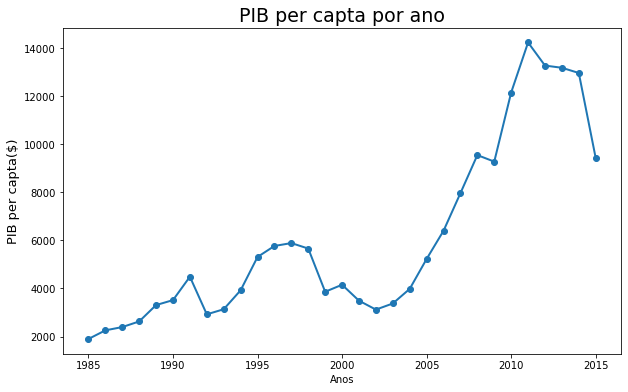

In [26]:
plt.figure(figsize=(10, 6))
gdp_media_brasil.plot(marker='o', linewidth=2)
plt.title('PIB per capta por ano', fontsize=19)
plt.ylabel('PIB per capta($)',fontsize=13)
plt.xlabel('Anos')
print()

* O PIB do Brasil aumentou bastante ao longo das últimas décadas. 
* A seguir, será mostrado se o PIB per capta influencia ou não o número de suicídios

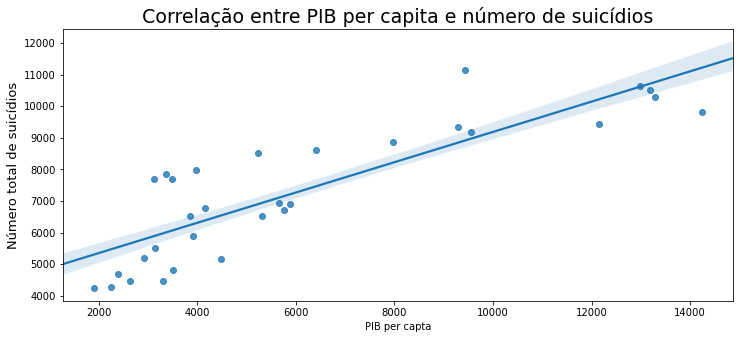

In [27]:
plt.figure(figsize=(12,5))
sns.regplot(x=gdp_media_brasil, y=total, ci=68, truncate=False)
plt.title('Correlação entre PIB per capita e número de suicídios', fontsize=19)
plt.ylabel('Número total de suicídios',fontsize=13)
plt.xlabel('PIB per capta')
print()

* O gráfico apenas confirma o mapa de calor dos dados do Brasil gerado anteriormente, onde mostra que apesar de ter aumentado o PIB per capta do Brasil, o número de suicídios também aumentou.

## Conclusão

* Ao longo dos anos, de 1985 até 2015, o número de suicídios no Brasil disparou, passando de de pouco mais de 4000 pessoas na década de 80 para mais de 10000 entre 2010 e 2015.


* Apesar disso, até 2015, o Brasil ficava atrás de dois dos países mais ricos das Américas (EUA e Canadá) e também do Chile e da Argentina.


* O número de suicídio no entre homens no Brasil é quase 3,6 vezes maior do que entre mulheres.


* O Brasil cresceu econômicamente nas últimas décadas, como mostra o PIB per capta por ano, mas isso não significa que o número de suicídios tenha decrescido.


* 2015 é ano que obteve o maior número de suicídios no Brasil


* O dataset não mostra quais foram os motivos dos suicídios, como desemprego, doença (depressão por exemplo), solidão, bullying, abuso de álcool e/ou drogas, etc., sendo necessário um estudo mais aprofundado sobre essas questões.


* As maiores vítimas são:
    * Homens (78,4%)
    * Pessoas da Geração X
    * Adultos entre 35 e 54 anos (35,2%)

## Ajuda

* O Ministério da Saúde possui no seu site formas de ajudar a prevenir o suicídio, mostrando os sinais para saber e agir. Link está disponível aqui: https://saude.gov.br/saude-de-a-z/suicidio


* Ligue para o 188 caso queira conversar com um voluntário do CVV (Centro de Valorização da Vida). A ligação vale para todo o território nacional, 24 horas todos os dias de forma gratuita. O link do CVV está disponível aqui: https://www.cvv.org.br/ligue-188/


* TODA vida importa!! S2